<a href="https://colab.research.google.com/github/Jac-Zac/PML_DL_Final_Project/blob/main/notebooks/notebook_train_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧙‍♂️ Training diffusion model

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Jac-Zac/PML_DL_Final_Project/blob/master/notebooks/notebook_train_flow.ipynb)

### Initial setup ⚙️

In [ ]:
!git fetch https://github.com/Jac-Zac/PML_DL_Final_Project.git

fatal: not a git repository (or any of the parent directories): .git


In [ ]:
import os

repo_dir = "PML_DL_Final_Project"

if not os.path.exists(repo_dir):
    !git clone https://github.com/Jac-Zac/PML_DL_Final_Project.git
else:
    print(f"Repository '{repo_dir}' already exists. Skipping clone.")

Repository 'PML_DL_Final_Project' already exists. Skipping clone.


In [ ]:
if os.path.isdir(repo_dir):
    %cd $repo_dir
    !pip install dotenv -q
else:
    print(f"Directory '{repo_dir}' not found. Please clone the repository first.")

/content/PML_DL_Final_Project


### 📦 Imports

In [ ]:
import torch
import numpy as np

from src.train.train import train
from src.utils.data import get_dataloaders
from src.utils.plots import plot_image_grid
from src.utils.environment import get_device, set_seed, load_pretrained_model

from src.models.flow import FlowMatching

# Since on a notebook we can have nicer bars
from tqdm.notebook import tqdm as tqdm_notebook

### 🛠️ Configuration Parameters

In [ ]:
epochs = 20
batch_size = 128
learning_rate = 2e-3
seed = 1337
checkpoint_path = "checkpoints/last.ckpt"
model_name = "unet"
method = "flow"  # or "flow"

### 🧪 Setup: Seed and Device

In [ ]:
set_seed(seed)
device = get_device()
os.makedirs("checkpoints", exist_ok=True)

## 🧠 Model Training

#### 📥 Data Loading

In [ ]:
# Returns DataLoaders that yield (image, timestep, label)
train_loader, val_loader = get_dataloaders(batch_size=batch_size)

#### Training

In [ ]:
# NOTE: Currently assumes 10 classes are hardcoded
num_classes = 10
# HACK: Hard-coded number of classes (MNIST = 10)
model_kwargs = {
    "num_classes": 10,
    "out_channels": 1,
    "time_emb_dim": 128,
    # NOTE: Change time embedding to learned for flow which is more sensible
    "time_embedding_type": "mlp" if args.method == "flow" else "sinusoidal",
}


# NOTE: Instead of using train directly you can write here your custom traiing code
# You can take inspiration from train to see how the checkpoints are saved

# NOTE: You can also directly copy all the code from train a cell above this and modify it inside the notebook
# similarly to what was done for the Flow Matching Class

# But if you use it directly you can directly use model you have from the train


In [ ]:
flow_model = train(
    num_epochs=epochs,
    device= device,
    dataloader = train_loader,
    val_loader = val_loader,
    use_wandb = True,
    checkpoint_path = checkpoint_path,
    model_kwargs = model_kwargs,
    method = method
)

WANDB_API_KEY environment variable not set. Please enter your WandB API key: d8dc3ad9caae0ce9504bfcf61be898d8fbdbef18


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jacopozac (jac-zac) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/20


Train Loss: 0.8979 | Val Loss: 0.6374 | LR: 0.000994
New best model saved! Epoch 1, Val Loss: 0.6374

Epoch 2/20


Train Loss: 0.6179 | Val Loss: 0.5879 | LR: 0.000976
New best model saved! Epoch 2, Val Loss: 0.5879

Epoch 3/20


Train Loss: 0.5768 | Val Loss: 0.5807 | LR: 0.000946
New best model saved! Epoch 3, Val Loss: 0.5807

Epoch 4/20


Train Loss: 0.5629 | Val Loss: 0.5518 | LR: 0.000905
New best model saved! Epoch 4, Val Loss: 0.5518

Epoch 5/20


Train Loss: 0.5559 | Val Loss: 0.5388 | LR: 0.000855
New best model saved! Epoch 5, Val Loss: 0.5388

Epoch 6/20


Train Loss: 0.5480 | Val Loss: 0.5435 | LR: 0.000796

Epoch 7/20


Train Loss: 0.5417 | Val Loss: 0.5461 | LR: 0.000730

Epoch 8/20


Train Loss: 0.5355 | Val Loss: 0.5309 | LR: 0.000658
New best model saved! Epoch 8, Val Loss: 0.5309

Epoch 9/20


Train Loss: 0.5299 | Val Loss: 0.5283 | LR: 0.000582
New best model saved! Epoch 9, Val Loss: 0.5283

Epoch 10/20


Train Loss: 0.5277 | Val Loss: 0.5154 | LR: 0.000505
New best model saved! Epoch 10, Val Loss: 0.5154

Epoch 11/20


Train Loss: 0.5204 | Val Loss: 0.5250 | LR: 0.000428

Epoch 12/20


Train Loss: 0.5179 | Val Loss: 0.5050 | LR: 0.000352
New best model saved! Epoch 12, Val Loss: 0.5050

Epoch 13/20


Train Loss: 0.5151 | Val Loss: 0.5085 | LR: 0.000280

Epoch 14/20


Train Loss: 0.5093 | Val Loss: 0.5007 | LR: 0.000214
New best model saved! Epoch 14, Val Loss: 0.5007

Epoch 15/20


Train Loss: 0.5057 | Val Loss: 0.5091 | LR: 0.000155

Epoch 16/20


Train Loss: 0.5051 | Val Loss: 0.5187 | LR: 0.000105

Epoch 17/20


Train Loss: 0.5079 | Val Loss: 0.5107 | LR: 0.000064

Epoch 18/20


Train Loss: 0.5053 | Val Loss: 0.4957 | LR: 0.000034
New best model saved! Epoch 18, Val Loss: 0.4957

Epoch 19/20


Train Loss: 0.5029 | Val Loss: 0.4912 | LR: 0.000016
New best model saved! Epoch 19, Val Loss: 0.4912

Epoch 20/20


Train Loss: 0.4991 | Val Loss: 0.4959 | LR: 0.000010


epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
learning_rate,███▇▇▇▆▆▅▅▄▃▃▂▂▂▁▁▁▁
train/loss_epoch,█▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
train/loss_step,█▄▅▂▂▂▃▂▂▂▃▃▂▂▂▂▁▁▂▂▂▁▂▂▃▂▂▃▃▂▁▂▂▂▂▂▂▂▂▂
val/loss,█▆▅▄▃▄▄▃▃▂▃▂▂▁▂▂▂▁▁▁
best_train_loss,0.50293
best_val_epoch,19
best_val_loss,0.49124
best_val_lr,2e-05
epoch,20
learning_rate,1e-05



Training complete. Best validation loss: 0.4912


## 💡 Image Generation

#### 🛠️ Configuration Parameters

In [ ]:
n_samples = 5     #number of classes I want to sample
save_dir = "samples"
max_steps = 1000
num_timesteps = 6

ckpt_path = "checkpoints/best_model.pth"  # or use your last checkpoint

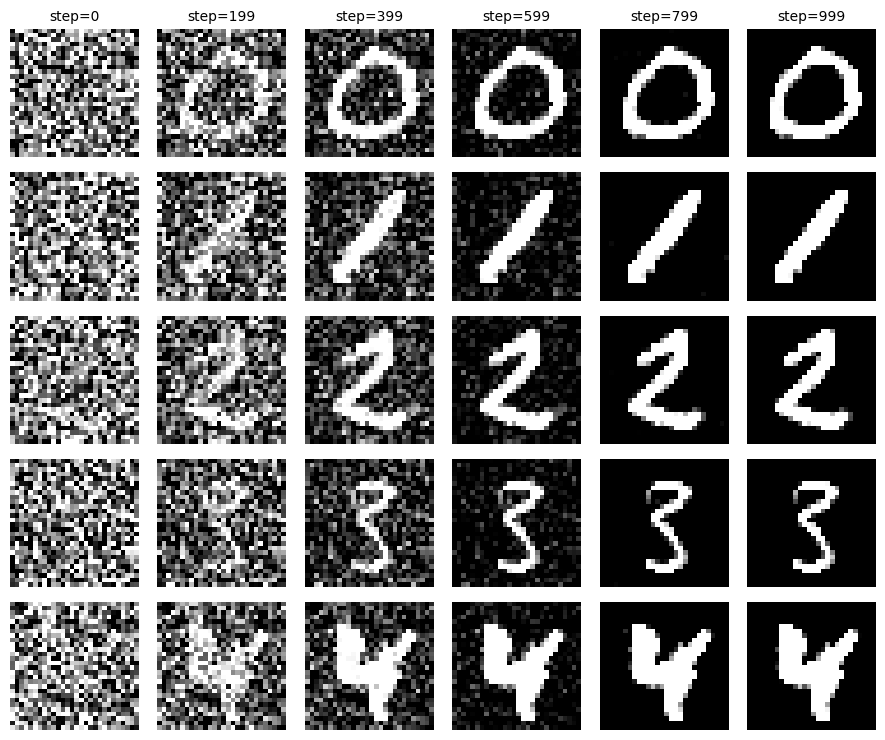

In [14]:
from PIL import Image
import torchvision.utils as vutils
import matplotlib.pyplot as plt

# 💫 Create diffusion sampler
flow = FlowMatching(img_size=28, device=device)

plot_image_grid(
    flow_model,
    flow,
    num_intermediate=num_timesteps,
    n=n_samples,
    max_steps=max_steps,
    save_dir=save_dir,
    device=device,
    num_classes=num_classes,
)


out_path = os.path.join(save_dir, "all_samples_grid.png")
display(Image.open(out_path))